In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [159]:
data = pd.read_csv('data.csv')

In [160]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,178,319.0,110.0,3,3.5,3.5,9.04,0
1,232,319.0,106.0,3,3.5,2.5,8.33,1
2,79,296.0,95.0,2,3.0,2.0,7.54,1
3,126,300.0,100.0,3,2.0,3.0,8.66,1
4,337,319.0,110.0,3,3.0,2.5,8.79,0


In [161]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
395,9,302.0,102.0,1,2.0,1.5,8.00,0
396,291,307.0,105.0,2,2.5,3.0,7.65,0
397,309,312.0,108.0,3,3.5,3.0,8.53,0
398,155,NaN,108.0,3,3.0,3.5,8.89,0
399,216,330.0,116.0,5,5.0,4.5,9.36,1


In [162]:
type(data['Serial No.'][0])

numpy.int64

In [163]:
type(data['GRE Score'][0])

numpy.float64

In [164]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,400.000000,378.000000,380.000000,400.000000,400.000000,400.000000,380.000000,400.000000
mean,200.500000,316.759259,107.386842,3.087500,3.400000,3.452500,8.604737,0.547500
std,115.614301,11.415599,6.048645,1.143728,1.006869,0.898478,0.599167,0.498362
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,100.750000,308.250000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.640000,1.000000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.080000,1.000000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


In [165]:
data['Research'].sum()

219

In [166]:
print('Total Research Applicants is %d.' % data['Research'].sum())

Total Research Applicants is 219.


In [167]:
data.isna()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False
398,False,True,False,False,False,False,False,False


In [168]:
data.isna().sum()

Serial No.            0
GRE Score            22
TOEFL Score          20
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
dtype: int64

In [169]:
data.fillna({
    'GRE Score': int(data['GRE Score'].mean()),
    'TOEFL Score': int(data['TOEFL Score'].mean()),
    'CGPA': data['CGPA'].mean(),
}, inplace=True)

In [170]:
print(data.describe())
print('Nan values :')
print(data.isna().sum())
data.head()

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.717500   107.367500           3.087500    3.400000   
std    115.614301   11.097774     5.895705           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  309.000000   103.000000           2.000000    2.500000   
50%    200.500000  316.000000   107.000000           3.000000    3.500000   
75%    300.250000  324.000000   111.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  
count  400.000000  400.000000  400.000000  
mean     3.452500    8.604737    0.547500  
std      0.898478    0.583957    0.498362  
min      1.000000    6.800000    0.000000  
25%      3.000000    8.200000    0.000000  
50%      3.500000    8.604737    1.000000 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,178,319.0,110.0,3,3.5,3.5,9.04,0
1,232,319.0,106.0,3,3.5,2.5,8.33,1
2,79,296.0,95.0,2,3.0,2.0,7.54,1
3,126,300.0,100.0,3,2.0,3.0,8.66,1
4,337,319.0,110.0,3,3.0,2.5,8.79,0


In [171]:
data['Subj'] = data['SOP']*0.3 + data['LOR']*0.7
data.head()

KeyError: 'LOR'

In [172]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'],
      dtype='object')

In [173]:
data.rename(columns={'LOR ': 'LOR'}, inplace=True)

In [174]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research'],
      dtype='object')

In [175]:
data['Subj'] = data['SOP']*0.3 + data['LOR']*0.7
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Subj
0,178,319.0,110.0,3,3.5,3.5,9.04,0,3.50
1,232,319.0,106.0,3,3.5,2.5,8.33,1,2.80
2,79,296.0,95.0,2,3.0,2.0,7.54,1,2.30
3,126,300.0,100.0,3,2.0,3.0,8.66,1,2.70
4,337,319.0,110.0,3,3.0,2.5,8.79,0,2.65


In [176]:
data.loc[data['Serial No.'] == 155]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Subj
398,155,316.0,108.0,3,3.0,3.5,8.89,0,3.35


In [177]:
if 'Serial No.' in data.columns:
    data.set_index('Serial No.', inplace=True)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Subj
Serial No.,,,,,,,,
178,319.0,110.0,3,3.5,3.5,9.04,0,3.50
232,319.0,106.0,3,3.5,2.5,8.33,1,2.80
79,296.0,95.0,2,3.0,2.0,7.54,1,2.30
126,300.0,100.0,3,2.0,3.0,8.66,1,2.70
337,319.0,110.0,3,3.0,2.5,8.79,0,2.65
...,...,...,...,...,...,...,...,...
9,302.0,102.0,1,2.0,1.5,8.00,0,1.65
291,307.0,105.0,2,2.5,3.0,7.65,0,2.85
309,312.0,108.0,3,3.5,3.0,8.53,0,3.15


In [178]:
data.sort_index()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Subj
Serial No.,,,,,,,,
1,337.0,118.0,4,4.5,4.5,9.65,1,4.50
2,324.0,107.0,4,4.0,4.5,8.87,1,4.35
3,316.0,107.0,3,3.0,3.5,8.00,1,3.35
4,316.0,110.0,3,3.5,2.5,8.67,1,2.80
5,314.0,103.0,2,2.0,3.0,8.21,0,2.70
...,...,...,...,...,...,...,...,...
396,324.0,110.0,3,3.5,3.5,9.04,1,3.50
397,325.0,107.0,3,3.0,3.5,9.11,1,3.35
398,330.0,116.0,4,5.0,4.5,9.45,1,4.65


In [179]:
data.sort_values(['University Rating', 'CGPA'], ascending=False)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Subj
Serial No.,,,,,,,,
203,340.0,120.0,5,4.5,4.5,9.91,1,4.50
204,334.0,120.0,5,4.0,5.0,9.87,1,4.70
386,316.0,117.0,5,5.0,5.0,9.82,1,5.00
35,331.0,112.0,5,4.0,5.0,9.80,1,4.70
25,336.0,119.0,5,4.0,3.5,9.80,1,3.65
...,...,...,...,...,...,...,...,...
80,294.0,93.0,1,1.5,2.0,7.36,0,1.85
348,299.0,94.0,1,1.0,1.0,7.34,0,1.00
349,302.0,99.0,1,2.0,2.0,7.25,0,2.00


In [180]:
data.sort_values(['CGPA'], ascending=False, inplace=True)

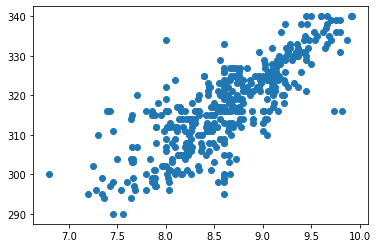

In [181]:
plt.scatter(data['CGPA'], data['GRE Score'])

In [182]:
dg = data.groupby('University Rating')

In [183]:
summary = pd.DataFrame()
summary['avg_cgpa'] = dg['CGPA'].mean()
summary['avg_gre'] = dg['GRE Score'].mean()
summary['sum_research'] = dg['Research'].sum()
summary

,avg_cgpa,avg_gre,sum_research
University Rating,,,
1,7.745769,303.153846,5
2,8.219144,309.710280,32
3,8.558405,315.894737,71
4,9.009922,324.013514,59
5,9.267570,327.916667,52


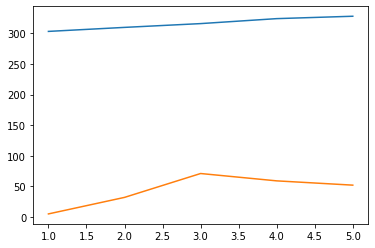

In [184]:
plt.plot(summary['avg_gre'])
plt.plot(summary['sum_research'])


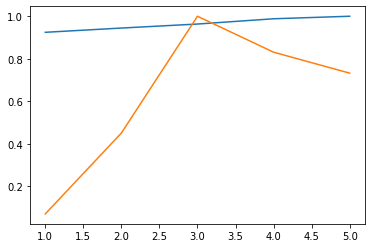

In [185]:
plt.plot(summary['avg_gre'] / summary['avg_gre'].max())
plt.plot(summary['sum_research'] / summary['sum_research'].max())


In [186]:
chance = pd.read_csv('chance.csv')
print(chance.describe())
print('Nan values :')
print(chance.isna().sum())
chance.head()

       Serial No.  Chance of Admit
count  400.000000       384.000000
mean   200.500000         0.724375
std    115.614301         0.142964
min      1.000000         0.340000
25%    100.750000         0.640000
50%    200.500000         0.730000
75%    300.250000         0.830000
max    400.000000         0.970000
Nan values :
Serial No.          0
Chance of Admit    16
dtype: int64


,Serial No.,Chance of Admit
0,21,0.64
1,39,0.52
2,3,0.72
3,374,0.79
4,247,0.72


In [ ]:
df = data.merge(chance, on='Serial No.')
print(df.describe())
df.head()

In [ ]:
for i in df.keys()[:-1] :
    print(i)
    plt.scatter(df[i].values, df['Chance of Admit'].values)
    plt.show()

In [203]:
df = df.sample(frac=1)
final_test = pd.isna(df['Chance of Admit'])
trainDF = df[~final_test]
edge = int(0.8*len(trainDF))
Xtrain = trainDF['CGPA'][:edge].values.reshape(-1,1)
Ytrain = trainDF['Chance of Admit'][:edge].values.reshape(-1)
Xtest = trainDF['CGPA'][edge:].values.reshape(-1,1)
Ytest = trainDF['Chance of Admit'][edge:].values.reshape(-1)

In [205]:
reg = LinearRegression()
reg.fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.7084427965685678

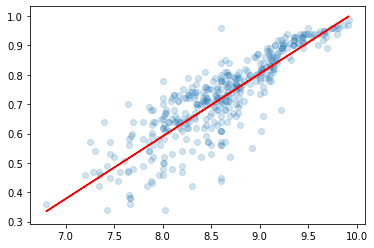

In [208]:
plt.scatter(df['CGPA'], df['Chance of Admit'], alpha=0.2)
plt.plot(df['CGPA'], reg.predict(df['CGPA'].values.reshape(-1,1)), c='r')
plt.show()

In [192]:
Xtrain = trainDF[df.columns[1:-1]][train].values.reshape(-1,len(df.columns)-2)
Ytrain = trainDF['Chance of Admit'][train].values.reshape(-1)
Xtest = trainDF[df.columns[1:-1]][test].values.reshape(-1,len(df.columns)-2)
Ytest = trainDF['Chance of Admit'][test].values.reshape(-1)
reg = LinearRegression()
reg.fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.7208292642759508

In [193]:
X = df[df.columns[1:-1]][final_test].values.reshape(-1,len(df.columns)-2)
df['Chance of Admit'][final_test] = reg.predict(X)
df[final_test]

/Users/ramtung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Subj,Chance of Admit
0,144,340.0,120.0,4,4.5,4.0,9.92,1,4.15,0.985052
84,397,325.0,107.0,3,3.0,3.5,9.11,1,3.35,0.815972
96,172,316.0,117.0,5,4.0,4.5,9.07,1,4.35,0.826101
111,252,316.0,99.0,2,2.5,3.0,9.00,0,2.85,0.733659
116,219,324.0,110.0,4,3.0,3.5,8.97,1,3.35,0.803434
129,2,324.0,107.0,4,4.0,4.5,8.87,1,4.35,0.814112
146,136,314.0,109.0,4,3.5,4.0,8.77,1,3.85,0.762648
159,339,323.0,108.0,5,4.0,4.0,8.74,1,4.00,0.790940
175,382,319.0,105.0,3,3.0,3.5,8.67,1,3.35,0.746142
275,295,316.0,101.0,2,2.5,2.0,8.32,1,2.15,0.657359
